<a href="https://colab.research.google.com/github/Ritik21-prog/DL/blob/main/DL_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning Assignment 3

Question 1 & 2 
1.	Create a single layer neural network to classify the self generated random data.
2. Study the single layer neural network for different Learning rates

In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [2]:
x = torch.rand(20,3)*10
x.shape

torch.Size([20, 3])

In [3]:
x

tensor([[9.2811, 9.4719, 0.1378],
        [7.2813, 4.2870, 5.8457],
        [4.6164, 8.0342, 3.5215],
        [1.9787, 3.4084, 7.9448],
        [2.6044, 4.7093, 4.7800],
        [9.4194, 7.6821, 4.7227],
        [4.9051, 4.4502, 8.8638],
        [7.6883, 9.9559, 8.9496],
        [0.4157, 3.5342, 1.0092],
        [7.3670, 8.6515, 0.3330],
        [1.2142, 9.1559, 2.7731],
        [5.2195, 7.3021, 0.7404],
        [8.4016, 5.7850, 3.8657],
        [2.3179, 9.6106, 9.4974],
        [9.6513, 3.3734, 2.0661],
        [2.7037, 0.1462, 0.9117],
        [4.0236, 4.7659, 7.8823],
        [7.5236, 6.8399, 0.0454],
        [7.3238, 9.8035, 8.1271],
        [8.5334, 2.9812, 7.6181]])

In [4]:
y = torch.rand(20,1)*100
y.shape

torch.Size([20, 1])

In [5]:
y

tensor([[ 4.6120],
        [89.6277],
        [68.4541],
        [13.9255],
        [78.4321],
        [ 6.0864],
        [70.7742],
        [68.2873],
        [51.9692],
        [66.8385],
        [91.9245],
        [52.9174],
        [91.3991],
        [63.3734],
        [77.8251],
        [38.9050],
        [24.2081],
        [88.0189],
        [45.3519],
        [84.1781]])

In [6]:
comparison = []

In [7]:
for step_size in [1e-2,1e-3,1e-4]:
    g = torch.Generator().manual_seed(2147483647)
    W = torch.randn((3,1), generator=g, requires_grad=True)
    loss_list = []
    for i in range(100):
        pred = x@W
        loss = (abs(y-pred)).sum()
        loss.backward()
        W.data -= step_size*W.grad
        W.grad = None
        if (i+1)%10==0:
            print(f'Epoch [{i+1}/100]: {loss}')
            loss_list.append(loss.item())
    comparison.append(loss_list)


Epoch [10/100]: 571.8908081054688
Epoch [20/100]: 538.7283325195312
Epoch [30/100]: 529.2715454101562
Epoch [40/100]: 525.5965576171875
Epoch [50/100]: 537.8642578125
Epoch [60/100]: 531.06396484375
Epoch [70/100]: 526.514404296875
Epoch [80/100]: 529.0806274414062
Epoch [90/100]: 526.68212890625
Epoch [100/100]: 525.4666748046875
Epoch [10/100]: 1173.51708984375
Epoch [20/100]: 921.3839111328125
Epoch [30/100]: 783.1090698242188
Epoch [40/100]: 705.8740234375
Epoch [50/100]: 645.1075439453125
Epoch [60/100]: 620.7944946289062
Epoch [70/100]: 604.4223022460938
Epoch [80/100]: 593.9976196289062
Epoch [90/100]: 583.5729370117188
Epoch [100/100]: 573.1483154296875
Epoch [10/100]: 1465.4991455078125
Epoch [20/100]: 1429.4520263671875
Epoch [30/100]: 1393.4049072265625
Epoch [40/100]: 1357.3577880859375
Epoch [50/100]: 1321.310791015625
Epoch [60/100]: 1285.2635498046875
Epoch [70/100]: 1249.2164306640625
Epoch [80/100]: 1213.1690673828125
Epoch [90/100]: 1177.1219482421875
Epoch [100/100]:

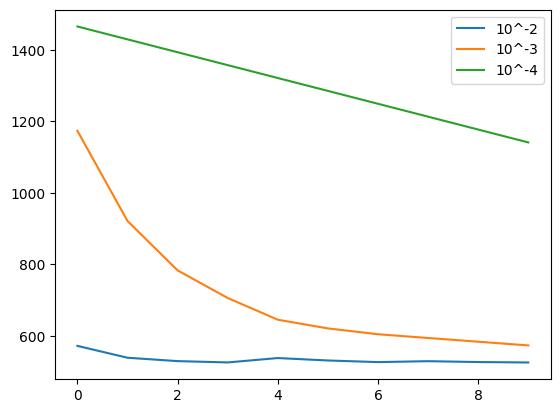

In [8]:
for l in comparison:
    plt.plot(l)
    plt.legend(['10^-2','10^-3','10^-4'])

Question 3
3.	Create a Deep Multi Layer Neural Network to classify self generated random data.

In [9]:
x = torch.rand(20,3)*10
y = torch.rand(20,1)*100

In [10]:
x

tensor([[4.3056, 1.7724, 9.1947],
        [1.5267, 3.0330, 6.6125],
        [2.6743, 5.1106, 4.4557],
        [7.0804, 8.8744, 6.5768],
        [7.9938, 4.0876, 6.5661],
        [1.5082, 0.0515, 0.6090],
        [2.1524, 6.1851, 1.0684],
        [3.9152, 7.1530, 8.6911],
        [1.8570, 8.7194, 3.3422],
        [9.5621, 4.7407, 1.5072],
        [7.4785, 3.7765, 8.3124],
        [1.3301, 8.9161, 6.6486],
        [1.1438, 0.1436, 4.9416],
        [8.7712, 4.0845, 3.9239],
        [2.3341, 1.3762, 7.4690],
        [5.8254, 6.6000, 8.5973],
        [6.9309, 5.0309, 2.3199],
        [8.0756, 8.6827, 9.4845],
        [7.6496, 6.5058, 8.2393],
        [7.8627, 7.8699, 6.3979]])

In [11]:
y

tensor([[22.4361],
        [40.3192],
        [79.6992],
        [95.2338],
        [68.2304],
        [90.2981],
        [82.8816],
        [41.8553],
        [22.8137],
        [10.0590],
        [77.3418],
        [11.1808],
        [87.1400],
        [72.4201],
        [18.3939],
        [35.8133],
        [19.9643],
        [84.1217],
        [94.6387],
        [35.4257]])

In [12]:
train_ds = TensorDataset(x,y)

In [13]:
batch_size=5
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [14]:
class MLP(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size,hidden_size)
        self.layer2 = nn.Linear(hidden_size,output_size)

    def forward(self,x):
        out = self.layer1(x)
        out = F.relu(out)
        out = self.layer2(out)
        out = F.relu(out)
        return out

In [15]:
input_size = 3
hidden_size = 8
output_size = 1
model = MLP(input_size,hidden_size,output_size)

In [16]:
loss_fn = F.mse_loss
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [17]:
def fit(epochs,model,loss_fn,opt,train_dl):
    for epoch in range(epochs):
        for x,y in train_dl:
            pred = model(x)
            loss = loss_fn(pred,y)
            loss.backward()
            opt.step()
            opt.zero_grad()
        if (epoch+1)%10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))

In [18]:
fit(100,model,loss_fn,opt,train_dl)

Epoch [10/100], Loss: 4802.2017
Epoch [20/100], Loss: 4402.9033
Epoch [30/100], Loss: 3813.3450
Epoch [40/100], Loss: 4157.4917
Epoch [50/100], Loss: 3521.7258
Epoch [60/100], Loss: 5386.6860
Epoch [70/100], Loss: 3990.1868
Epoch [80/100], Loss: 3644.3093
Epoch [90/100], Loss: 5223.3604
Epoch [100/100], Loss: 4822.6514
